## Usage

The package only contains methods to simplify your code, so it doesn't cover all steps of machine learning process, but only those that save you lines of code.

In [1]:
#!pip install smltk==2.2.1
!pip install /home/jovyan/ --use-feature=in-tree-build

!pip install nltk
!pip install wordcloud
%pip install mlxtend --upgrade

import numpy as np
from smltk.preprocessing import Ntk
nlp = Ntk()
from smltk.metrics import Metrics
mtr = Metrics()

DEPRECATION: In-tree builds are now the default. pip 22.1 will enforce this behaviour change. A possible replacement is to remove the --use-feature=in-tree-build flag.
Processing /home/jovyan
  Preparing metadata (setup.py) ... done
  Created wheel for smltk: filename=smltk-2.2.1-py3-none-any.whl size=12701 sha256=774618bcb72339ca6b2748e84bcff3b00ae65c03407617a2bda28896aefc470a
  Stored in directory: /tmp/pip-ephem-wheel-cache-qsdpvdob/wheels/84/2f/4f/b37be5d933960388ebbaf44c07058c333038b22896d24f3e9c
Successfully built smltk
     |████████████████████████████████| 1.5 MB 2.0 MB/s            
     |████████████████████████████████| 763 kB 3.5 MB/s            
     |████████████████████████████████| 363 kB 4.6 MB/s            
     |████████████████████████████████| 1.3 MB 3.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Example with nltk library

In [2]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
docs_pos = [nltk.corpus.movie_reviews.raw(review) for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])]
docs_neg = [nltk.corpus.movie_reviews.raw(review) for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])]

#### Preprocessing

In [4]:
# data reduction
vocab_pos = nlp.create_vocab_from_docs(docs_pos)
#vocab_pos = nlp.create_vocab_from_docs(nltk.Text(nltk.corpus.movie_reviews.words(categories=["pos"])))
vocab_neg = nlp.create_vocab_from_docs(docs_neg)
#vocab_neg = nlp.create_vocab_from_docs(nltk.Text(nltk.corpus.movie_reviews.words(categories=["neg"])))
vocabs = {'pos': vocab_pos, 'neg': vocab_neg}

pos
(15791, 27546)


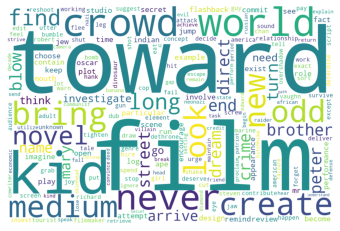

neg
(14665, 25738)


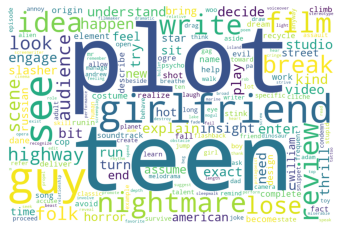

In [5]:
# distribution
for target in vocabs.keys():
  print(target)
  print(nlp.get_stats_vocab(vocabs[target], 2))
  nlp.create_words_cloud(nlp.create_words_map(vocabs[target]))

In [6]:
# data cleaning
vocabs_cleaned = nlp.get_vocabs_cleaned(vocabs)

In [7]:
# data wrangling
top_100_pos = nlp.get_words_top(vocabs_cleaned['pos'], 100)
top_100_neg = nlp.get_words_top(vocabs_cleaned['neg'], 100)

features = nlp.create_features_from_docs(docs_pos, 'pos', words_top = top_100_pos)
features.extend(nlp.create_features_from_docs(docs_neg, 'neg', words_top = top_100_neg))

In [8]:
# splitting
from nltk.sentiment.util import split_train_test
X_train, X_test = split_train_test(features)

#### Modeling

In [9]:
# fitting
classifier = nltk.NaiveBayesClassifier.train(X_train)

array([[108,  74],
       [ 86, 132]])

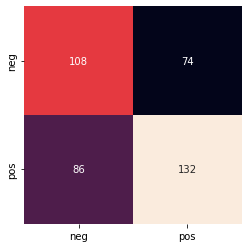

In [10]:
# testing
y_test, y_pred = mtr.prediction(classifier, 'classify', X_test)
mtr.create_confusion_matrix(y_test, y_pred)

In [11]:
mtr.get_classification_metrics({
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.19819315931825934,
 'ROC_AUC': 0.5994555902812784,
 'Accuracy': 0.6,
 'Precision': array([0.55670103, 0.6407767 ]),
 'Recall': array([0.59340659, 0.60550459]),
 'Fscore': array([0.57446809, 0.62264151]),
 'Support': array([182, 218])}

#### Prediction

In [12]:
classifier.classify(nlp.get_features(docs_pos[0]))

'pos'

In [13]:
classifier.classify(nlp.get_features(docs_neg[0]))

'neg'

### Example with sklearn library - wine dataset

In [14]:
from sklearn.datasets import load_wine
data = load_wine()

#### Preprocessing

In [15]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=5)

#### Modeling

In [16]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
model.fit(X_train, y_train)

SGDClassifier(random_state=3)

array([[16,  0,  1],
       [ 2,  4,  5],
       [ 3,  1,  4]])

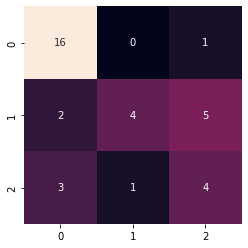

In [17]:
# testing
y_pred = model.predict(X_test)
mtr.create_confusion_matrix(y_test, y_pred)

In [18]:
mtr.get_classification_metrics({
    "model": model,
    "X_train": np.array(X_train),
    "y_train": np.array(y_train),
    "X_test": np.array(X_test),
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0.7443055555555557,
 'Bias': 0.3698465277777778,
 'Variance': 0.3744590277777778,
 'MCC': 0.4802259242337604,
 'ROC_AUC': 0,
 'Accuracy': 0.6666666666666666,
 'Precision': array([0.76190476, 0.8       , 0.4       ]),
 'Recall': array([0.94117647, 0.36363636, 0.5       ]),
 'Fscore': array([0.84210526, 0.5       , 0.44444444]),
 'Support': array([17, 11,  8])}

#### Management

In [19]:
mtr.save_model(model, 'model.pkl')
model.score(X_test, y_test)

0.6111111111111112

In [20]:
model_resumed = mtr.resume_model('model.pkl')
model_resumed.score(X_test, y_test)

0.6111111111111112

### Example with sklearn library - text dataset

In [21]:
!if [ ! -f 'sentiment labelled sentences.zip' ]; then wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip; fi
!if [ ! -d 'sentiment labelled sentences' ]; then unzip 'sentiment labelled sentences.zip'; fi
!ls -ltr 'sentiment labelled sentences'

total 208
-rw-r--r-- 1 jovyan users 85285 Feb 15  2015 imdb_labelled.txt
-rw-r--r-- 1 jovyan users  1070 May 31  2015 readme.txt
-rw-r--r-- 1 jovyan users 61320 Jul  5  2016 yelp_labelled.txt
-rw-r--r-- 1 jovyan users 58226 Jul  5  2016 amazon_cells_labelled.txt


In [22]:
!cat 'sentiment labelled sentences/amazon_cells_labelled.txt' | head -n 5

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1


In [23]:
import pandas as pd
data = pd.read_csv(
  'sentiment labelled sentences/amazon_cells_labelled.txt',
  sep='\t',
  names=['text', 'sentiment']
)

#### Preprocessing

(609, 1465)


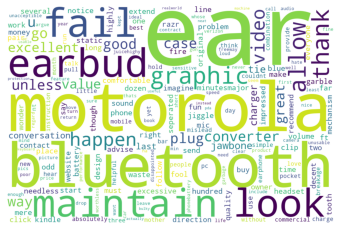

In [24]:
# distribution
vocabulary = nlp.create_vocab_from_docs(data['text'])
print(nlp.get_stats_vocab(vocabulary, 2))
nlp.create_words_cloud(nlp.create_words_map(vocabulary))

In [25]:
# data cleaning
data['text_cleaned'] = data['text'].apply(nlp.get_doc_cleaned)

In [26]:
# distribution
vocabulary = nlp.create_vocab_from_docs(data['text_cleaned'])
print(nlp.get_stats_vocab(vocabulary, 2))
nlp.create_words_cloud(nlp.create_words_map(vocabulary), is_test = True)

(602, 1452)


#### Modeling by vectors

In [27]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text_cleaned'], data['sentiment'], test_size=0.2, random_state=3)

In [28]:
# vectorization
X_vect_train = nlp.vectorize_docs(X_train, is_lemma = True)
X_vect_test = nlp.vectorize_docs(X_test, is_lemma = True, is_test = True)

In [29]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
model.fit(X_vect_train, y_train)

SGDClassifier(random_state=3)

array([[84, 21],
       [29, 66]])

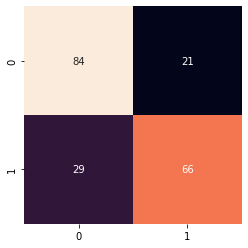

In [30]:
# testing
y_pred = model.predict(X_vect_test)
mtr.create_confusion_matrix(y_test, y_pred, is_test = False)

In [31]:
mtr.get_classification_metrics({
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.49834700984605873,
 'ROC_AUC': 0.7473684210526317,
 'Accuracy': 0.75,
 'Precision': array([0.74336283, 0.75862069]),
 'Recall': array([0.8       , 0.69473684]),
 'Fscore': array([0.7706422 , 0.72527473]),
 'Support': array([105,  95])}

#### Modeling by vectors and tokenization

In [32]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = nlp) #, ngram_range = (1, 2)
X_vect_train = vectorizer.fit_transform(X_train)
X_vect_test = vectorizer.transform(X_test)

In [33]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
model.fit(X_vect_train, y_train)

SGDClassifier(random_state=3)

array([[84, 21],
       [29, 66]])

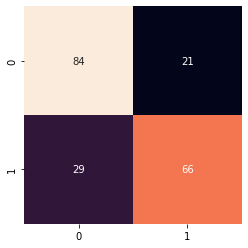

In [34]:
# testing
y_pred = model.predict(X_vect_test)
mtr.create_confusion_matrix(y_test, y_pred, is_test = False)

In [35]:
mtr.get_classification_metrics({
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.49834700984605873,
 'ROC_AUC': 0.7473684210526317,
 'Accuracy': 0.75,
 'Precision': array([0.74336283, 0.75862069]),
 'Recall': array([0.8       , 0.69473684]),
 'Fscore': array([0.7706422 , 0.72527473]),
 'Support': array([105,  95])}

#### Modeling by features

In [36]:
# data wrangling
top_100 = nlp.get_words_top(vocabulary, 100)

features = nlp.get_features_from_docs(data.text, words_top = top_100)
features_df = pd.DataFrame.from_dict(features, orient='columns')
data = pd.concat([data, features_df], axis='columns')

In [37]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['words_top', 'neg', 'neu', 'pos', 'compound']], data['sentiment'], test_size=0.2, random_state=3)

In [38]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
model.fit(X_train, y_train)

SGDClassifier(random_state=3)

array([[98,  7],
       [34, 61]])

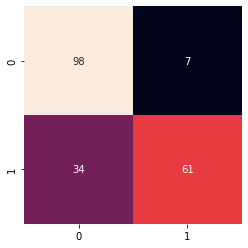

In [39]:
# testing
y_pred = model.predict(X_test)
mtr.create_confusion_matrix(y_test, y_pred, is_test = False)

In [40]:
mtr.get_classification_metrics({
    "model": model,
    "X_train": np.array(X_train),
    "y_train": np.array(y_train),
    "X_test": np.array(X_test),
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0.23532499999999998,
 'Bias': 0.153603875,
 'Variance': 0.081721125,
 'MCC': 0.6066162196580951,
 'ROC_AUC': 0.787719298245614,
 'Accuracy': 0.795,
 'Precision': array([0.74242424, 0.89705882]),
 'Recall': array([0.93333333, 0.64210526]),
 'Fscore': array([0.82700422, 0.74846626]),
 'Support': array([105,  95])}

#### Modeling by vectors and features

In [41]:
# data reduction
features_mix = data[['text_cleaned', 'words_top', 'neg', 'neu', 'pos', 'compound']].to_dict(orient="records")

In [42]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_mix, data['sentiment'], test_size=0.2, random_state=3)

In [43]:
# vectorization
X_vect_train = nlp.vectorize_docs(X_train)
X_vect_test = nlp.vectorize_docs(X_test, is_test = True)

In [44]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
model.fit(X_vect_train, y_train)

SGDClassifier(random_state=3)

array([[95, 10],
       [31, 64]])

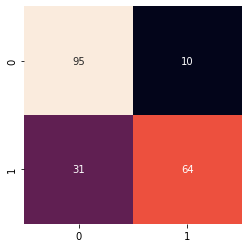

In [45]:
# testing
y_pred = model.predict(X_vect_test)
mtr.create_confusion_matrix(y_test, y_pred, is_test = False)

In [46]:
mtr.get_classification_metrics({
    "y_test": np.array(y_test),
    "y_pred": y_pred
})

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.5982989333106916,
 'ROC_AUC': 0.7892230576441103,
 'Accuracy': 0.795,
 'Precision': array([0.75396825, 0.86486486]),
 'Recall': array([0.9047619 , 0.67368421]),
 'Fscore': array([0.82251082, 0.75739645]),
 'Support': array([105,  95])}

### Example with sklearn library - pipeline

In [47]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=3)

In [48]:
# data preparation
vectorizer = CountVectorizer()
X_vect_train = vectorizer.fit_transform(X_train) 
X_vect_test = vectorizer.transform(X_test)
# modeling
model = SGDClassifier(random_state=3)
model.fit(X_vect_train, y_train) # training
mtr.scoring(model, X_vect_test, y_test) # testing

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.5887959168743058,
 'ROC_AUC': 0.7942355889724311,
 'Accuracy': 0.795,
 'Precision': array([0.80188679, 0.78723404]),
 'Recall': array([0.80952381, 0.77894737]),
 'Fscore': array([0.8056872 , 0.78306878]),
 'Support': array([105,  95])}

In [49]:
from sklearn.pipeline import Pipeline
# data preparation
pipeline = Pipeline([
    ('count', CountVectorizer()),
    ('class', SGDClassifier(random_state=3))
])
# modeling
mtr.modeling(pipeline, X_train, y_train, X_test, y_test)

{'Loss': 0,
 'Bias': 0,
 'Variance': 0,
 'MCC': 0.5887959168743058,
 'ROC_AUC': 0.7942355889724311,
 'Accuracy': 0.795,
 'Precision': array([0.80188679, 0.78723404]),
 'Recall': array([0.80952381, 0.77894737]),
 'Fscore': array([0.8056872 , 0.78306878]),
 'Support': array([105,  95])}